## Student Information
- Name: 劉田元
- Student ID: 110062328 (NTHU)
- GitHub ID: SheridanM551 (https://github.com/SheridanM551)

### Third: please attempt the following tasks on the new dataset


In [37]:
import pandas as pd

# df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

df = pd.read_csv('Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv')

# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


In [38]:
# perform a quick check of the data
display(df.head())
print(df.shape)
display(df.describe())
display(df['sentiment'].value_counts()) # quite balanced

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...


(1500, 2)


,sentiment,comment
count,1500,1500
unique,2,1499
top,not nostalgia,never heard this song before... WOW What an am...
freq,750,2


sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64

In [39]:
# there seems to have one duplicate row (comment unique = 1499 while the total number of rows = 1500)
df.drop_duplicates(inplace=True)

In [40]:
display(df.describe())
display(df['sentiment'].value_counts())

,sentiment,comment
count,1499,1499
unique,2,1499
top,nostalgia,He was a singer with a golden voice that I lov...
freq,750,1


sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64

In [41]:
# tokenize the comments
# stemming and removing stopwords
# lowercase the words
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
import re

nltk.download('stopwords')
stop = stopwords.words('english')

def tokenizer_stem_nostop(text):
    porter = PorterStemmer()
    return [porter.stem(w) for w in re.split('\s+', text.strip()) \
            if w not in stop and re.match('[a-zA-Z]+', w)]

# here is just a test to see if the function works
df['tokenized'] = df['comment'].apply(tokenizer_stem_nostop)    
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\劉田元\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,comment,tokenized
0,not nostalgia,He was a singer with a golden voice that I lov...,"[he, singer, golden, voic, i, love, hear, time..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[the, mist, beauti, voic, ever, i, listen, i, ..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[i, mr., reev, songs., alway, love, smooth, vo..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[day, leav, tour, viet, nam, convinc, mari, lo..."
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listen, song, remind, mum, play, everyday]"


In [46]:
# model 1: TF-IDF with Bernoulli naive Bayes
# map the sentiment to 1 and 0
# split the data into train and test (80/20), with stratification
# train the Naive Bayes classifier (Bernoulli naive Bayes)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(lowercase=False, preprocessor=None, tokenizer=tokenizer_stem_nostop)
# train/test
X = df['comment']
y = df['sentiment'].map({'nostalgia': 1, 'not nostalgia': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

# Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

nb = BernoulliNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1199, 4018)
(300, 4018)
0.87
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       150
           1       0.85      0.90      0.87       150

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [47]:
# model 2: word frequency with Multinomial naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

count = CountVectorizer(lowercase=False, preprocessor=None, tokenizer=tokenizer_stem_nostop)
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred = nb.predict(X_test_count)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.85
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       150
           1       0.80      0.93      0.86       150

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



In [ ]:
# differences
# the accuracy of the two models are about the same, with the TF-IDF model slightly better
# which might indicate TF-IDF contains less noise

c:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


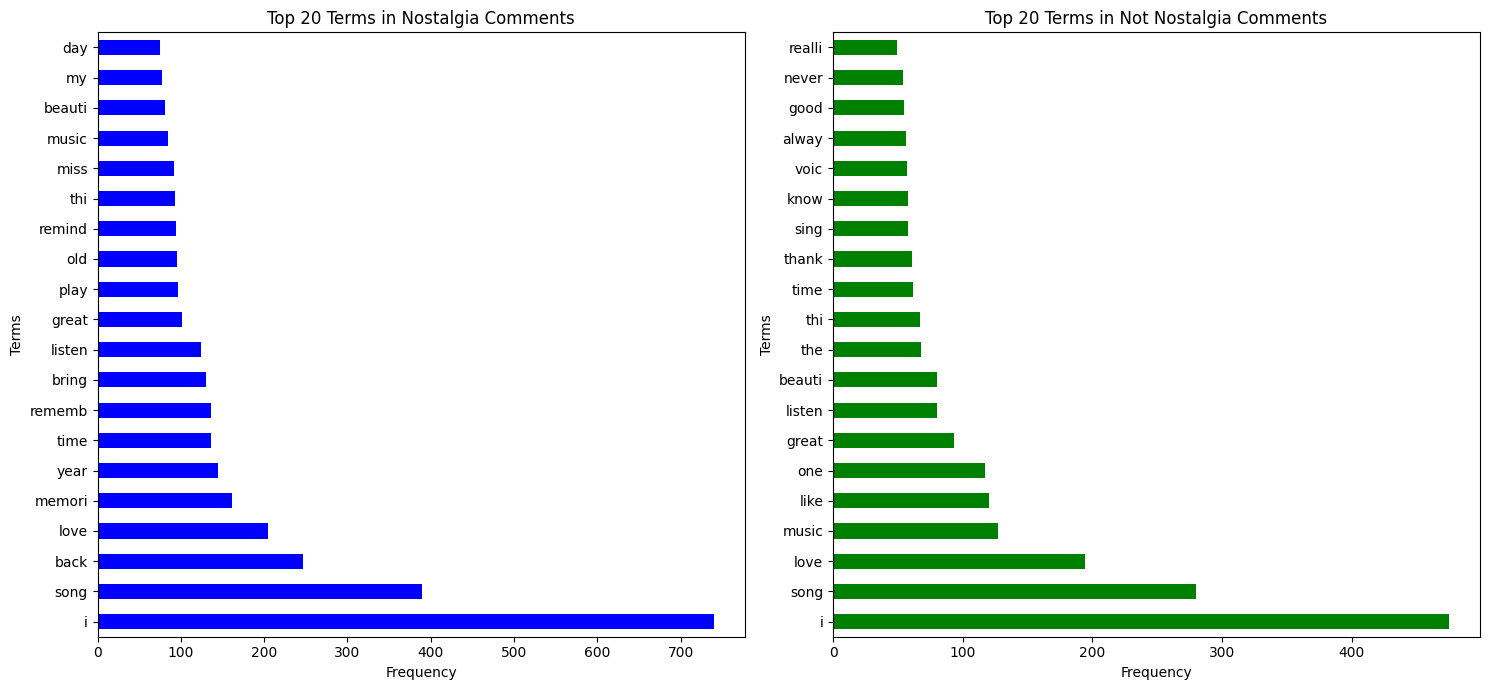

In [58]:
# data visualization 1: term frequency
import matplotlib.pyplot as plt

# term frequency for nostalgia
count2 = CountVectorizer(lowercase=False, preprocessor=None, tokenizer=tokenizer_stem_nostop)
nostalgia_count = count2.fit_transform(df[df['sentiment'] == 'nostalgia']['comment'])
nostalgia_count = nostalgia_count.toarray().sum(axis=0)
nostalgia_count = pd.Series(nostalgia_count, index=count2.get_feature_names_out())

# nostalgia_count.sort_values(ascending=False).head(20).plot(kind='barh')

# term frequency for not nostalgia
count3 = CountVectorizer(lowercase=False, preprocessor=None, tokenizer=tokenizer_stem_nostop)
not_nostalgia_count = count3.fit_transform(df[df['sentiment'] == 'not nostalgia']['comment'])
not_nostalgia_count = not_nostalgia_count.toarray().sum(axis=0)
not_nostalgia_count = pd.Series(not_nostalgia_count, index=count3.get_feature_names_out())

# not_nostalgia_count.sort_values(ascending=False).head(20).plot(kind='barh')

# Plotting the term frequencies for nostalgia and not nostalgia side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot for nostalgia
nostalgia_count.sort_values(ascending=False).head(20).plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Top 20 Terms in Nostalgia Comments')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Terms')

# Plot for not nostalgia
not_nostalgia_count.sort_values(ascending=False).head(20).plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Top 20 Terms in Not Nostalgia Comments')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Terms')

plt.tight_layout()
plt.show()

c:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


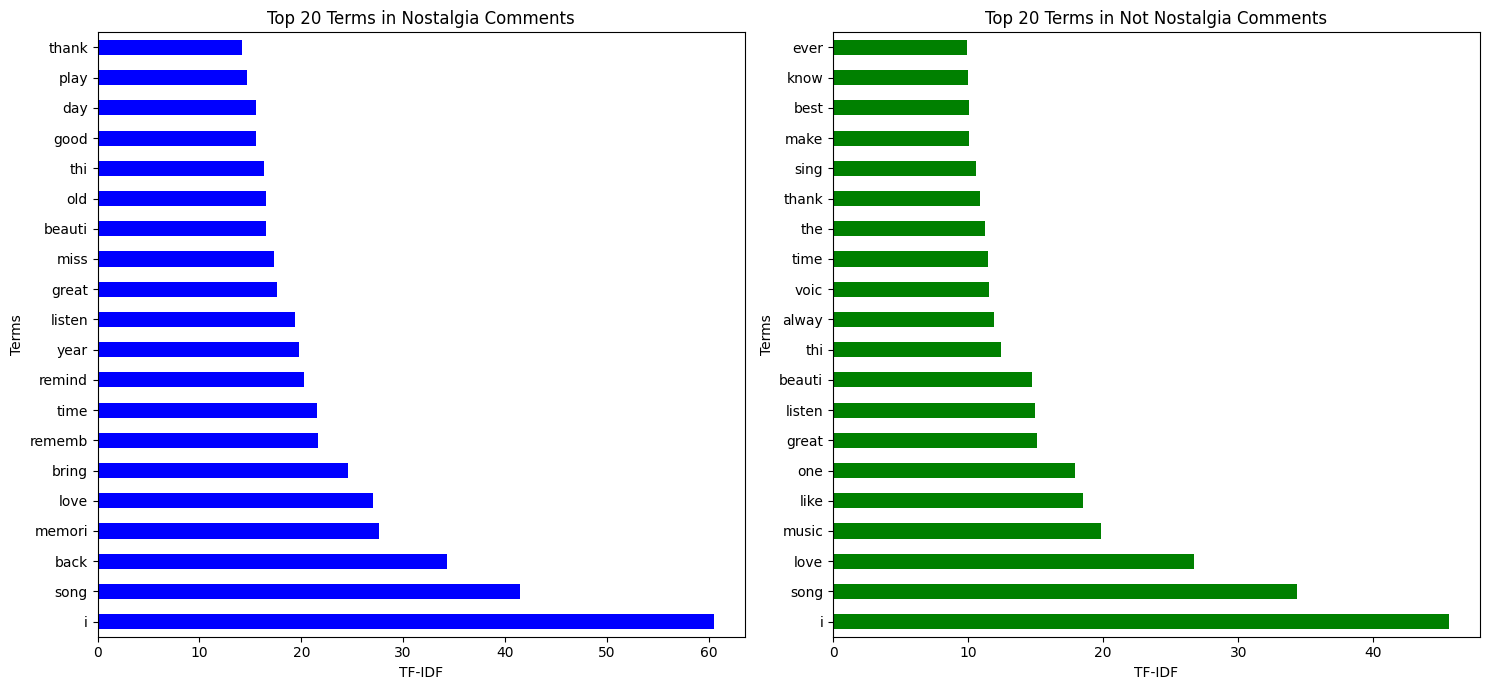

In [61]:
# data visualization 2: tf-idf
# TF-IDF for nostalgia
tfidf2 = TfidfVectorizer(lowercase=False, preprocessor=None, tokenizer=tokenizer_stem_nostop, max_df=0.8)
nostalgia_tfidf = tfidf2.fit_transform(df[df['sentiment'] == 'nostalgia']['comment'])
nostalgia_tfidf = nostalgia_tfidf.toarray().sum(axis=0)
nostalgia_tfidf = pd.Series(nostalgia_tfidf, index=tfidf2.get_feature_names_out())

# TF-IDF for not nostalgia
tfidf3 = TfidfVectorizer(lowercase=False, preprocessor=None, tokenizer=tokenizer_stem_nostop, max_df=0.8)
not_nostalgia_tfidf = tfidf3.fit_transform(df[df['sentiment'] == 'not nostalgia']['comment'])
not_nostalgia_tfidf = not_nostalgia_tfidf.toarray().sum(axis=0)
not_nostalgia_tfidf = pd.Series(not_nostalgia_tfidf, index=tfidf3.get_feature_names_out())

# Plotting the TF-IDF for nostalgia and not nostalgia side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot for nostalgia
nostalgia_tfidf.sort_values(ascending=False).head(20).plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Top 20 Terms in Nostalgia Comments')
axes[0].set_xlabel('TF-IDF')
axes[0].set_ylabel('Terms')

# Plot for not nostalgia
not_nostalgia_tfidf.sort_values(ascending=False).head(20).plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Top 20 Terms in Not Nostalgia Comments')
axes[1].set_xlabel('TF-IDF')
axes[1].set_ylabel('Terms')

plt.tight_layout()
plt.show()


c:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


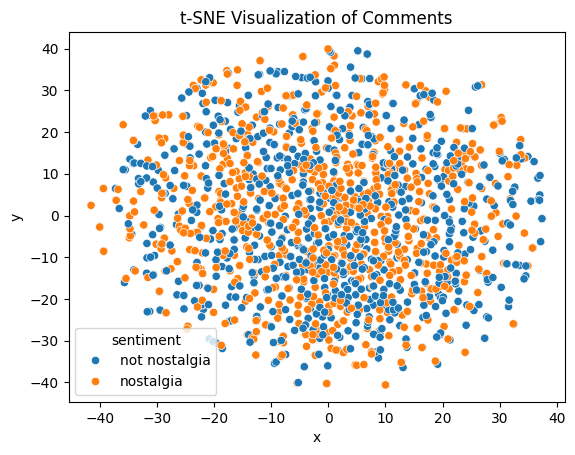

In [62]:
# t-SNE visualization
from sklearn.manifold import TSNE
import seaborn

# TF-IDF for all comments
tfidf4 = TfidfVectorizer(lowercase=False, preprocessor=None, tokenizer=tokenizer_stem_nostop, max_df=0.8)
all_tfidf = tfidf4.fit_transform(df['comment'])

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
all_tfidf_tsne = tsne.fit_transform(all_tfidf.toarray())

# plot
df_tsne = pd.DataFrame(all_tfidf_tsne, columns=['x', 'y'])
df_tsne['sentiment'] = df['sentiment']

seaborn.scatterplot(data=df_tsne, x='x', y='y', hue='sentiment')
plt.title('t-SNE Visualization of Comments')
plt.show()

# the t-SNE visualization shows that the comments are not well separated

###  Fourth: What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

In [ ]:
# In the lab, there is still room for improvement in the text preprocessing part. 
# The first step is to deal with stopwords, because these words will appear in almost all articles, 
# which is not helpful for data visualization or classifier training. 
# Secondly, stemming or Lemmatization can also be performed on different types of characters, 
# which can effectively reduce unnecessary noise and improve training speed (since the feature dimension decreases).